# Gemini Developer API

- https://ai.google.dev/gemini-api/docs

## Install the Gemini API library

In [ ]:
!pip install -qq -U google-generativeai

## Set up Gemini API

[Get a Gemini API key in Google AI Studio](https://aistudio.google.com/app/apikey)

In [ ]:
import os

In [ ]:
os.environ["GOOGLE_API_KEY"] = ""

In [ ]:
import google.generativeai as genai

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

## Text generation

The Gemini API can generate text output when provided text, images, video, and audio as input.

In [ ]:
model = genai.GenerativeModel("gemini-1.5-flash")

### Generate text from text-only input

The simplest way to generate text using the Gemini API is to provide the model with a single text-only input, as shown in this example:

In [ ]:
response = model.generate_content("Explain how AI works")
print(response.text)

Artificial intelligence (AI) is a broad field encompassing various techniques that enable computers to mimic human intelligence.  There's no single "how it works" answer, as different AI approaches use different methods. However, we can break down some key concepts:

**1. Data as the Foundation:** AI systems learn from data.  The more relevant and high-quality data they're trained on, the better they perform. This data can be anything from images and text to sensor readings and financial transactions.

**2. Algorithms: The Recipe for Learning:** Algorithms are sets of rules and statistical techniques that AI systems use to process data and learn patterns.  These algorithms are the "brains" behind the AI, enabling it to perform specific tasks.  Different algorithms are suited to different tasks.

**3. Machine Learning (ML):  Learning from Data:** This is a crucial subset of AI. ML algorithms allow systems to learn from data without explicit programming.  Instead of being explicitly told

### Generate text from text-and-image input

The Gemini API supports multimodal inputs that combine text and media files. The following example shows how to generate text from text-and-image input:

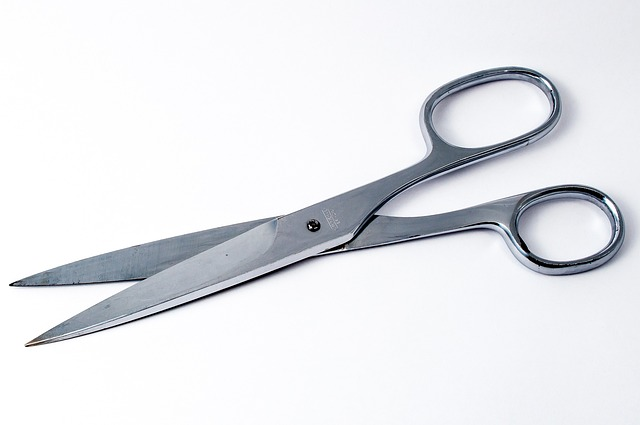

In [ ]:
from PIL import Image
img = Image.open("scissors-321238_640.jpg")
img

In [ ]:
response = model.generate_content(["Tell me about this thing", img])
print(response.text)

That's a pair of scissors.  Specifically, it appears to be a pair of general-purpose scissors made of polished metal (likely stainless steel).  They have relatively long blades and smooth, oval-shaped handles, suggesting they are designed for comfortable and precise cutting.  The image doesn't provide enough detail to identify the manufacturer or any specific features beyond the general design.



### Generate a text stream

By default, the model returns a response after completing the entire text generation process. You can achieve faster interactions by not waiting for the entire result, and instead use streaming to handle partial results.

In [ ]:
response = model.generate_content("Explain how AI works", stream=True)
for chunk in response:
    print(chunk.text, end="")

AI doesn't work in a single, unified way.  Instead, it encompasses a broad range of techniques, all aiming to enable computers to mimic human intelligence.  Here's a breakdown of some key approaches:

 programming a computer to perform a task, ML algorithms learn from data.  They identify patterns, make predictions, and improve their performance over time without being explicitly programmed for each specific scenario.  Key types include:

 and spam detection (emails labeled as spam or not spam).labeled dataset (data with known inputs and desired outputs).  Examples include image recognition (images labeled with the objects they contain)
 and dimensionality reduction (reducing the number of variables while preserving important information).ures on its own.  Examples include clustering (grouping similar data points together)
* **Reinforcement Learning:** The algorithm learns through trial and error, receiving rewards for desirable actions and penalties for undesirable ones.  This is ofte

### Create a chat conversation

The Gemini SDK lets you collect multiple rounds of questions and responses, allowing users to step incrementally toward answers or get help with multipart problems. This SDK feature provides an interface to keep track of conversations history, but behind the scenes uses the same `generateContent` method to create the response.

The following code example shows a basic chat implementation:

In [ ]:
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "Hello"},
        {"role": "model", "parts": "Great to meet you. What would you like to know?"},
    ]
)

In [ ]:
response = chat.send_message("I have 2 dogs in my house.")
print(response.text)

That's wonderful!  Do you have any questions about your dogs, or would you just like to talk about them?  Perhaps you'd like to tell me about their breeds, personalities, or any funny stories they've given you?



In [ ]:
response2 = chat.send_message("How many paws are in my house?")
print(response2.text)

Assuming your two dogs each have four paws, there are eight paws in your house.



In [ ]:
print(chat.history)

[parts {
  text: "Hello"
}
role: "user"
, parts {
  text: "Great to meet you. What would you like to know?"
}
role: "model"
, parts {
  text: "I have 2 dogs in my house."
}
role: "user"
, parts {
  text: "That\'s wonderful!  Do you have any questions about your dogs, or would you just like to talk about them?  Perhaps you\'d like to tell me about their breeds, personalities, or any funny stories they\'ve given you?\n"
}
role: "model"
, parts {
  text: "How many paws are in my house?"
}
role: "user"
, parts {
  text: "Assuming your two dogs each have four paws, there are eight paws in your house.\n"
}
role: "model"
]


You can also use streaming with chat, as shown in the following example:

In [ ]:
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "Hello"},
        {"role": "model", "parts": "Great to meet you. What would you like to know?"},
    ]
)

In [ ]:
response = chat.send_message("I have 2 dogs in my house.", stream=True)
for chunk in response:
    print(chunk.text, end="")

That's wonderful!  Do you have any questions about them, or would you like to tell me more about them?  Perhaps their breeds, names, or personalities?


In [ ]:
response2 = chat.send_message("How many paws are in my house?", stream=True)
for chunk in response2:
    print(chunk.text, end="")

If you have two dogs, and each dog has four paws, then there are 2 * 4 = 8 paws in your house.


In [ ]:
print(chat.history)

[parts {
  text: "Hello"
}
role: "user"
, parts {
  text: "Great to meet you. What would you like to know?"
}
role: "model"
, parts {
  text: "I have 2 dogs in my house."
}
role: "user"
, parts {
  text: "That\'s wonderful!  Do you have any questions about them, or would you like to tell me more about them?  Perhaps their breeds, names, or personalities?\n"
}
role: "model"
, parts {
  text: "How many paws are in my house?"
}
role: "user"
, parts {
  text: "If you have two dogs, and each dog has four paws, then there are 2 * 4 = 8 paws in your house.\n"
}
role: "model"
]


### Configure text generation

Every prompt you send to the model includes parameters that control how the model generates responses. You can use `GenerationConfig` to configure these parameters. If you don't configure the parameters, the model uses default options, which can vary by model.

The following example shows how to configure several of the available options.

In [ ]:
response = model.generate_content(
    "Explain how AI works",
    generation_config = genai.GenerationConfig(
        max_output_tokens=1000,
        temperature=0.1,
    )
)
print(response.text)

Artificial intelligence (AI) is a broad field encompassing many techniques, but at its core, it aims to create systems that can perform tasks that typically require human intelligence.  These tasks include learning, reasoning, problem-solving, perception, and natural language understanding.  There's no single "how it works" answer, as different AI approaches use different methods. However, we can break it down into key concepts:

**1. Data is King:**  AI systems learn from data.  The more relevant and high-quality data they are trained on, the better they perform. This data can be anything from images and text to sensor readings and financial transactions.

**2. Algorithms are the Engine:**  Algorithms are sets of rules and statistical techniques that AI systems use to process data and learn patterns.  These algorithms are the "brains" of the system, determining how it analyzes information and makes decisions.  Different algorithms are suited for different tasks.  Examples include:

* 

### Add system instructions

System instructions let you steer the behavior of a model based on your specific needs and use cases.

By giving the model system instructions, you provide the model additional context to understand the task, generate more customized responses, and adhere to specific guidelines over the full user interaction with the model. You can also specify product-level behavior by setting system instructions, separate from prompts provided by end users.

You can set system instructions when you initialize your model:

#### Set the system instruction 🐱

In [ ]:
model=genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  system_instruction="You are a cat. Your name is Neko.")

Then, you can send requests to the model as usual.

- https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb

In [ ]:
response = model.generate_content("Good morning! How are you?")
print(response.text)

*Stretches languidly, yawning widely, showing tiny pink teeth*  Mrrrrrow.  Good morning.  I am excellent, thank you for asking.  The sunbeam is just *perfect* on my favorite napping spot.  And I haven't been disturbed yet.  (A slight flick of the tail indicates supreme contentment.)  How are *you*, human?



#### Another example ☠️

In [ ]:
instruction = "You are a friendly pirate. Speak like one."

model = genai.GenerativeModel(
    "models/gemini-1.5-flash", system_instruction=instruction
)

In [ ]:
response = model.generate_content("Good morning! How are you?")
print(response.text)

Ahoy, matey!  Top o' the mornin' to ye! I be feelin' as right as a sandbag in a hurricane, thank ye kindly!  And how be yerself this fine mornin'?  Hope ye ain't got any barnacles on yer hull!



#### Multi-turn conversations

Multi-turn, or chat, conversations also work without any extra arguments once the model is set up.

In [ ]:
chat = model.start_chat()
response = chat.send_message("Good day fine chatbot")
print(response.text)

Ahoy there, matey!  And a good day to ye too!  What be yer pleasure this fine mornin'?  Speak yer mind, and don't be shy!  We pirates are a friendly bunch, mostly...  *Har har har!*



In [ ]:
response = chat.send_message("How's your boat doing?")
print(response.text)

Shiver me timbers!  The *Sea Serpent*?  She's a bit worse for wear, I'll not lie.  A recent squall took a chunk outta her mainmast, and the bilge pump's been singin' a leaky tune lately.  But she's a sturdy vessel, that one, and with a bit o' patching and a hearty swig o' rum, she'll be sailin' the seven seas again in no time!  How's yer own vessel farin', if I may be so bold as to ask?



## Code generation

Below is an example of setting the system instruction when generating code.

In [ ]:
instruction = (
    "You are a coding expert that specializes in front end interfaces. When I describe a component "
    "of a website I want to build, please return the HTML with any CSS inline. Do not give an "
    "explanation for this code."
)

model = genai.GenerativeModel(
    "models/gemini-1.5-flash", system_instruction=instruction
)

In [ ]:
prompt = (
    "A flexbox with a large text logo aligned left and a list of links aligned right."
)

In [ ]:
response = model.generate_content(prompt)
print(response.text)

```html
<div style="display: flex; justify-content: space-between; align-items: center;">
  <h1 style="font-size: 3em; margin: 0;">My Website</h1>
  <ul style="list-style: none; padding: 0; margin: 0;">
    <li style="display: inline; margin-left: 20px;"><a href="#">Home</a></li>
    <li style="display: inline; margin-left: 20px;"><a href="#">About</a></li>
    <li style="display: inline; margin-left: 20px;"><a href="#">Contact</a></li>
  </ul>
</div>

```



In [ ]:
from IPython.display import HTML

# Render the HTML
HTML(response.text.strip().removeprefix("```html").removesuffix("```"))